## Загрузка и подключение к базе данных

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext sql

In [5]:
%sql sqlite:///data/data.db

%config SqlMagic.displaylimit = 50

# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

In [6]:
%%sql response <<
    select
        c.wo_hit_rk as hit_rk, 
        c.wo_task_rk as task_rk, 
        c.wo_queue_id as queue_id, 
        c.agent_login, 
        c.wo_employee_rk, 
        datetime(c.finish_dttm) as call_finish_dttm,
        c.duratoin_sec,
        
        rt.*,
        
        pr.hid, 
        pr.using_flg,
        
        ts.task_stage_id, 
        ts.source_system_cd, 
        datetime(ts.create_dttm) as task_create_dttm, 
        datetime(ts.finish_dttm) as task_finish_dttm,
        
        qu.queue_desc,
        
        ho.horoscope,
        
        gr.group_nm,
        
        mn.management_nm
        
    from
        call as c
    left join
        action as ac on ac.hit_rk = c.wo_hit_rk
    left join
        result as rt on rt.hit_status_result_id = ac.hit_status_result_id
    left join
        product as pr on pr.hit_rk = ac.hit_rk
    left join
        task as ts on ts.task_rk = c.wo_task_rk
    left join
        queue as qu on qu.queue_id = c.wo_queue_id
    left join
        horoscope as ho on ho.agent_login = c.agent_login
    left join
        emp_x_org_gr as emp on emp.employee_rk = c.wo_employee_rk
    left join
        "group" as gr on gr.org_group_rk = emp.org_group_rk
    left join
        mngmnt as mn on mn.org_management_rk = gr.org_management_rk

 * sqlite:///data/data.db
Done.
Returning data to local variable response


In [7]:
response

hit_rk,task_rk,queue_id,agent_login,wo_employee_rk,call_finish_dttm,duratoin_sec,hit_status_result_id,hit_status_result_desc,hid,using_flg,task_stage_id,source_system_cd,task_create_dttm,task_finish_dttm,queue_desc,horoscope,group_nm,management_nm
73292106,93625442,12245,lyangama,66749466,2022-08-01 12:52:25,0,5,Недозвон,4,None,1.0,GI,2022-08-01 00:46:37,2022-08-01 15:35:39,Очередь 143,Козерог,Группа 30,Управление КЦ Чизан
93763347,98572816,11696,enkoiion,88931008,2022-08-08 10:46:46,"12,53",2,"Дозвон, Перезвонить",3,None,1.0,GI,2022-08-06 11:24:23,2022-08-17 11:23:53,Очередь 4,Козерог,Группа 20,Управление КЦ Мас
13988704,91292760,14354,kinalapo,61041016,2022-08-16 14:16:03,0,5,Недозвон,4,None,1.0,GI,2022-07-29 04:46:37,2022-09-22 10:57:30,Очередь 58,Козерог,Группа 5,Управление КЦ Ромашка
28495290,12470192,14303,kinasgsa,98181009,2022-08-22 18:38:13,0,5,Недозвон,4,None,1.0,GI,2022-08-21 01:55:57,2022-08-30 12:59:05,Очередь 79,Козерог,Группа 19,Управление КЦ Верс
31412029,161228,9264,ikovnisu,47451124,2022-08-23 10:38:24,"128,47",1,"Дозвон, Отказ",2,None,1.0,GI,2022-08-08 01:01:35,2022-08-23 10:38:33,Очередь 43,Козерог,Группа 31,Управление КЦ Казан
82299889,85191861,14644,atovksip,77811117,2022-08-04 10:53:26,0,5,Недозвон,4,None,1.0,GI,2022-07-22 17:38:27,2022-08-12 14:57:49,Очередь 119,Козерог,Группа 48,Управление КЦ Неп
89329077,98650151,12245,oyankrsh,88658588,2022-08-06 13:32:42,0,5,Недозвон,4,None,1.0,GI,2022-08-06 06:30:48,2022-08-09 15:49:22,Очередь 143,Козерог,Группа 36,Управление КЦ Чизан
19715922,9596828,14644,llinirra,59539859,2022-08-18 13:19:21,"71,99",1,"Дозвон, Отказ",4,None,1.0,GI,2022-08-18 00:47:21,2022-08-18 13:19:26,Очередь 119,Козерог,Группа 29,Управление КЦ Дирим
42214192,14854023,13044,novabbmu,11371111,2022-08-26 11:47:11,"208,12",1,"Дозвон, Отказ",4,None,23.0,FW,2022-08-24 04:11:24,2022-08-26 11:47:11,Очередь 111,Козерог,Группа 15,Управление КЦ Шоколад
51183929,18611189,13045,ievavamu,4241040,2022-08-30 16:45:57,0,5,Недозвон,4,None,23.0,FW,2022-08-30 03:10:40,2022-08-31 10:05:40,Очередь 29,Козерог,Группа 42,Управление КЦ Супер


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [8]:
%%sql
    with table_one as (
    select
        c.wo_hit_rk as hit_rk, 
        c.wo_task_rk as task_rk, 
        c.wo_queue_id as queue_id, 
        c.agent_login, 
        c.wo_employee_rk, 
        datetime(c.finish_dttm) as call_finish_dttm,
        c.duratoin_sec,
        
        rt.*,
        
        pr.hid, 
        pr.using_flg,
        
        ts.task_stage_id, 
        ts.source_system_cd, 
        datetime(ts.create_dttm) as task_create_dttm, 
        datetime(ts.finish_dttm) as task_finish_dttm,
        
        qu.queue_desc,
        
        ho.horoscope,
        
        gr.group_nm,
        
        mn.management_nm
        
    from
        call as c
    left join
        action as ac on ac.hit_rk = c.wo_hit_rk
    left join
        result as rt on rt.hit_status_result_id = ac.hit_status_result_id
    left join
        product as pr on pr.hit_rk = ac.hit_rk
    left join
        task as ts on ts.task_rk = c.wo_task_rk
    left join
        queue as qu on qu.queue_id = c.wo_queue_id
    left join
        horoscope as ho on ho.agent_login = c.agent_login
    left join
        emp_x_org_gr as emp on emp.employee_rk = c.wo_employee_rk
    left join
        "group" as gr on gr.org_group_rk = emp.org_group_rk
    left join
        mngmnt as mn on mn.org_management_rk = gr.org_management_rk
    ),
    suc_call as (
        select 
            count(*) as suc
        from 
            table_one
        where hit_status_result_id = 3
    ),
    fail_call as (
        select 
            cast(count(*) as float) as fail
        from 
            table_one
        where hit_status_result_id = 1
    ),
    mean_suc_call as (
        select
            avg(cast(replace(duratoin_sec, ',', '.') as float)) as duration
        from
            table_one
        where 
            hit_status_result_id = 3
            --and duratoin_sec > 0
        order by 1
    ),
    fin as
    (select 
        1 as "Номер",
        suc as "Ответы"
    from 
        suc_call
        
        
    union all
    
    select
        2,
        round((suc / (suc + fail)), 2)
    from 
        suc_call
    join
        fail_call
        
    union all
    
    select
        3,
        round(duration, 2)
    from
        mean_suc_call
    
    )
    select * from fin
    
    
    limit 5

 * sqlite:///data/data.db
Done.


Номер,Ответы
1,3310
2,0.15
3,110.18


In [9]:
df = pd.DataFrame(response.DataFrame())

def _convert_object_to_date_and_time(x: pd.DataFrame) -> pd.DataFrame:
    x['call_finish_dttm'] = pd.to_datetime(x['call_finish_dttm'])
    x['task_create_dttm'] = pd.to_datetime(x['task_create_dttm'])
    x['task_finish_dttm'] = pd.to_datetime(x['task_finish_dttm'])
    x['duratoin_sec'] = x['duratoin_sec'].str.replace(',','.').astype(float)
    return x

def _create_date_create_dttm(x: pd.DataFrame) -> pd.DataFrame:
    x['date_create_dttm'] = x['task_create_dttm'].dt.date
    return x

df = (df
      .pipe(_convert_object_to_date_and_time)
      .pipe(_create_date_create_dttm)
      
      )

df_dummies = pd.concat((df, pd.get_dummies(df['hit_status_result_desc'])), axis=1, sort=False)
df_dummies['successful_duratoin_sec'] = df_dummies[df_dummies['Дозвон, Успешно'] == 1]['duratoin_sec']

a = df_dummies['Дозвон, Успешно'].sum()
b = round(df_dummies['Дозвон, Успешно'].sum() / (df_dummies['Дозвон, Успешно'].sum() + df_dummies['Дозвон, Отказ'].sum()), 2)
c = round(df_dummies['successful_duratoin_sec'].mean(), 2)
pd.DataFrame({
    'Ответы': [a, b, c]
})

,Ответы
0,3310.00
1,0.15
2,110.18


In [10]:
df_group = df_dummies.groupby('date_create_dttm').agg(
    count_successful_call = ('Дозвон, Успешно', 'sum'),
    count_failure_call = ('Дозвон, Отказ', 'sum'),
    mean_duration_suc_call = ('successful_duratoin_sec', 'mean')
)
df_conversion = pd.DataFrame()
df_conversion['conversion'] = df_group['count_successful_call'] / (df_group['count_successful_call'] + df_group['count_failure_call'])
df_conversion['mean_duration_suc_call'] = df_group['mean_duration_suc_call'].round()
df_conversion.sort_values(by='conversion', ascending=False)

,conversion,mean_duration_suc_call
date_create_dttm,,
2022-05-24,1.0,14.0
2021-12-21,1.0,128.0
2022-05-05,0.5,33.0
2022-05-31,0.5,103.0
2022-06-04,0.5,177.0
...,...,...
2022-05-30,NaN,NaN
2022-06-01,NaN,NaN
2022-06-02,NaN,NaN


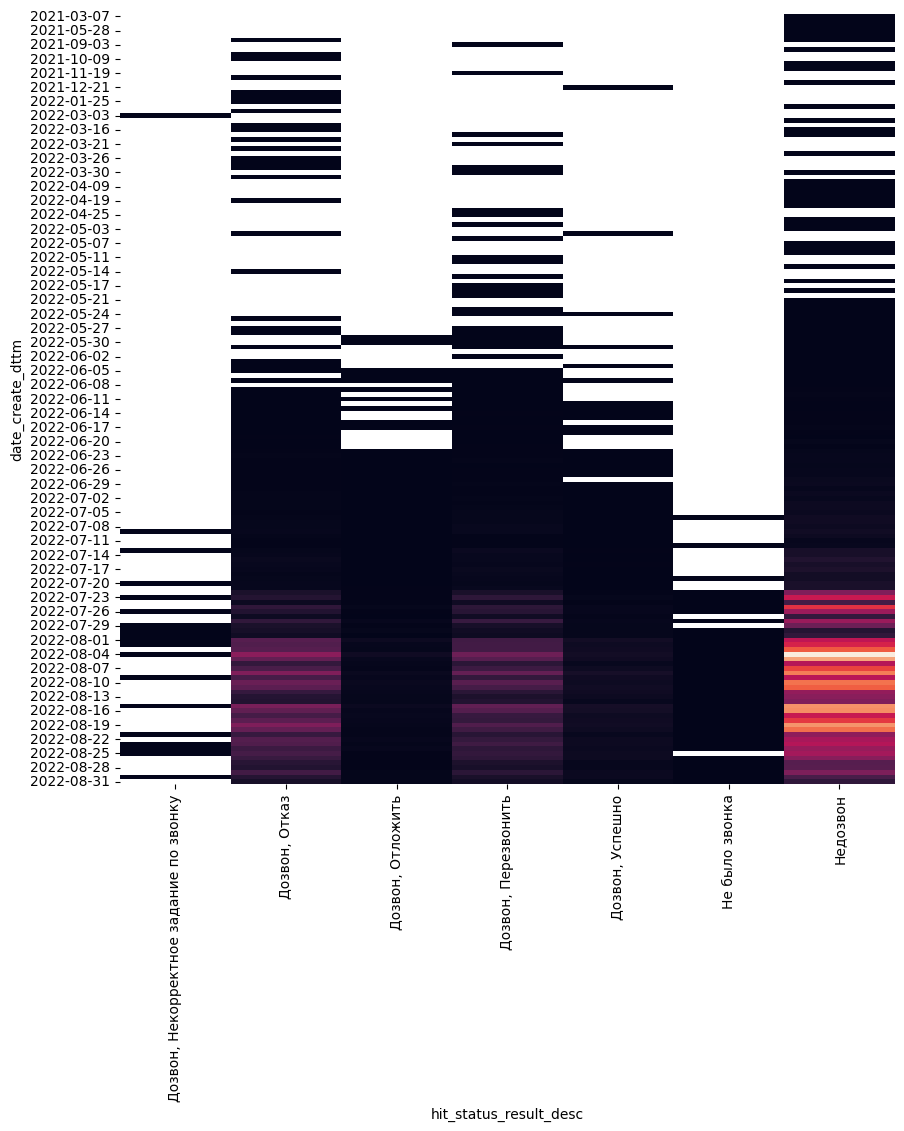

In [11]:
df_pivot_table = df.pivot_table(
    values='hit_rk',
    index='date_create_dttm',
    columns='hit_status_result_desc',
    aggfunc='count'
)

plt.figure(figsize=(10,10))
sns.heatmap(df_pivot_table, cbar=False, cmap=sns.cm.rocket)
plt.show()

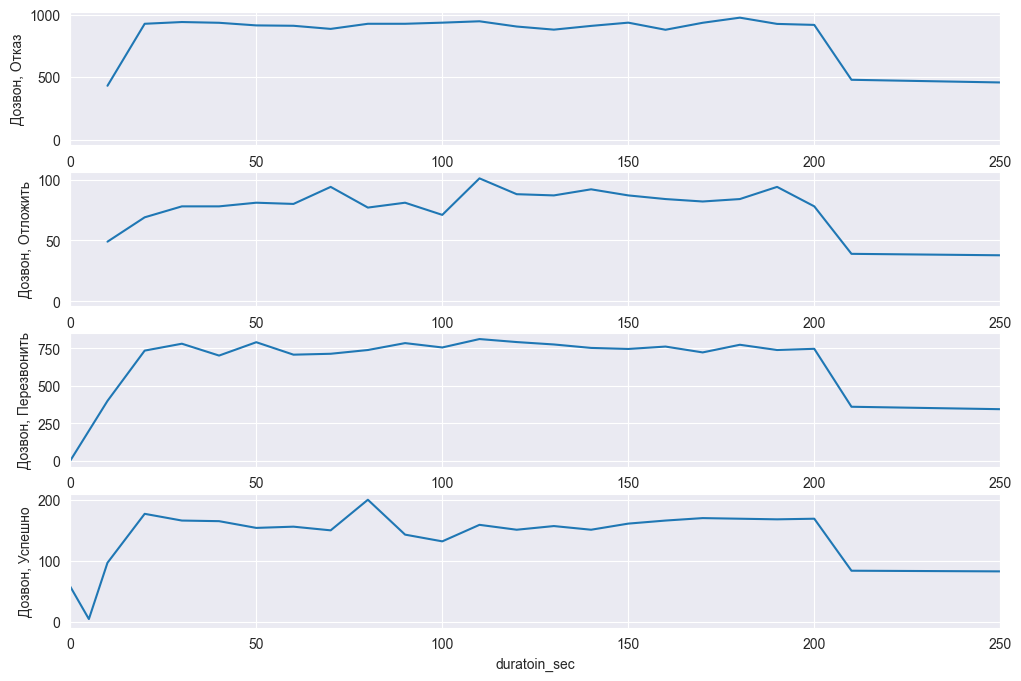

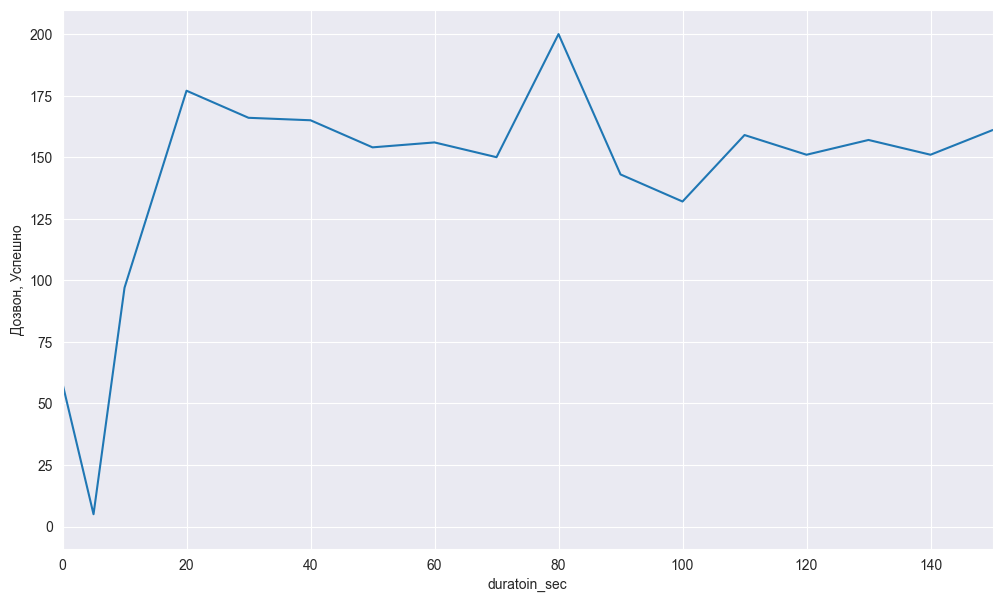

In [12]:
def _convert_duration(x: pd.Series) -> pd.Series:
    import numpy as np
    match x:
        case 0 | None:
            return 0
        case _ if x < 5:
            return 5
        case _ if x < 10:
            return 10
        case _ if x < 300:
            return round(x, -1)
        case _:
            return round(x, -2)

duration = df['duratoin_sec'].apply(_convert_duration)
duration = pd.concat((duration, df['hit_status_result_desc']), axis=1)
duration = duration.pivot_table(values=None, index='duratoin_sec', columns='hit_status_result_desc', aggfunc=len)
# duration = duration.sort_values(by='duratoin_sec', ignore_index=True, ascending=False)
duration
sns.reset_orig()
sns.set_style('darkgrid')
fg, ax = plt.subplots(nrows=len(duration.columns[1:-2]), ncols=1, figsize=(12, 8))
for index, value in enumerate(duration.columns[1:-2]):
    sns.lineplot(
        data=duration,
        x='duratoin_sec',
        y=value,
        ax=ax[index]
        # ax=index
        
    ).set(xlim=(0,250))
fig = plt.figure(figsize=(12, 7))
linep = sns.lineplot(
    data=duration,
    x='duratoin_sec',
    y='Дозвон, Успешно',
)
linep.set(xlim=(0,150))
plt.show()

In [13]:
suc_call_zeros = df_dummies[df_dummies['successful_duratoin_sec'] == 0]['agent_login'].value_counts()
suc_call_zeros

agent_login
cyanrser    51
yrovibna     7
Name: count, dtype: int64

In [14]:
sac_call_less_30 = df_dummies[(df_dummies['successful_duratoin_sec'] <= 30) & (df_dummies['successful_duratoin_sec'] != 0)]['agent_login'].value_counts()
sac_call_less_30

agent_login
cyanrser    19
kovadapi     3
novalvku     3
tyangaeg     3
5527mvsa     3
            ..
erbavash     1
kovabmmu     1
0715yusf     1
7292kgne     1
ievaarku     1
Name: count, Length: 300, dtype: int64

In [15]:
# df_dummies
call_from_agent = df_dummies.groupby(by='agent_login').agg(
    all_call = ('hit_rk', 'count'),
    suc_call = ('Дозвон, Успешно', 'sum'),
    fail_call = ('Дозвон, Отказ', 'sum')
)
call_from_agent['conversion'] = round(call_from_agent['suc_call'] / (call_from_agent['suc_call'] + call_from_agent['fail_call']), 2)
call_from_agent = call_from_agent.sort_values('conversion', ascending=False).reset_index()

print(f'Количество агентов без успешных дозвонов', end='')
print(f' {call_from_agent[call_from_agent["suc_call"] == 0]["suc_call"].count()}', end='')
print(f' из {call_from_agent.shape[0]}')
display(call_from_agent.head())

Количество агентов без успешных дозвонов 674 из 1962


,agent_login,all_call,suc_call,fail_call,conversion
0,0018lash,8,2,0,1.0
1,lovazmba,21,4,0,1.0
2,kovaal.v,5,1,0,1.0
3,3645tsle,1,1,0,1.0
4,3640rrra,13,2,0,1.0


In [16]:
# df_dummies
call_from_group = df_dummies.groupby(by='group_nm').agg(
    all_call = ('hit_rk', 'count'),
    suc_call = ('Дозвон, Успешно', 'sum'),
    fail_call = ('Дозвон, Отказ', 'sum')
)
call_from_group['conversion'] = round(call_from_group['suc_call'] / (call_from_group['suc_call'] + call_from_group['fail_call']), 2)
call_from_group = call_from_group.sort_values('conversion', ascending=False).reset_index()

print(f'Количество групп без успешных дозвонов', end='')
print(f' {call_from_group[call_from_group["suc_call"] == 0]["suc_call"].count()}', end='')
print(f' из {call_from_group.shape[0]}')
display(call_from_group.head())

Количество групп без успешных дозвонов 4 из 52


,group_nm,all_call,suc_call,fail_call,conversion
0,Группа 17,1434,257,116,0.69
1,Группа 2,1274,195,106,0.65
2,Группа 32,58,13,9,0.59
3,Группа 6,549,130,130,0.50
4,Группа 37,672,78,124,0.39


In [21]:
call_from_management = df_dummies.groupby(by='management_nm').agg(
    all_call = ('hit_rk', 'count'),
    suc_call = ('Дозвон, Успешно', 'sum'),
    fail_call = ('Дозвон, Отказ', 'sum')
)
call_from_management['conversion'] = round(call_from_management['suc_call'] / (call_from_management['suc_call'] + call_from_management['fail_call']), 2)
call_from_management = call_from_management.sort_values('conversion', ascending=False).reset_index()

print(f'Количество групп без успешных дозвонов', end='')
print(f' {call_from_management[call_from_management["suc_call"] == 0]["suc_call"].count()}', end='')
print(f' из {call_from_management.shape[0]}')
display(call_from_management.head())

Количество групп без успешных дозвонов 3 из 45


,management_nm,all_call,suc_call,fail_call,conversion
0,Управление КЦ Хирс,1274,195,106,0.65
1,Управление КЦ Дилис,58,13,9,0.59
2,Управление КЦ Керс,2361,297,299,0.50
3,Управление КЦ Ребус,802,140,231,0.38
4,Управление КЦ Шоколад,1831,127,286,0.31


In [25]:
call_from_horoscope = df_dummies.groupby(by='horoscope').agg(
    all_call = ('hit_rk', 'count'),
    suc_call = ('Дозвон, Успешно', 'sum'),
    fail_call = ('Дозвон, Отказ', 'sum')
)
call_from_horoscope['conversion'] = round(call_from_horoscope['suc_call'] / (call_from_horoscope['suc_call'] + call_from_horoscope['fail_call']), 2)
call_from_horoscope = call_from_horoscope.sort_values('conversion', ascending=False).reset_index()

display(call_from_horoscope)

,horoscope,all_call,suc_call,fail_call,conversion
0,Стрелец,3350,225,842,0.21
1,Скорпион,1692,94,377,0.20
2,Близнецы,7294,323,1398,0.19
3,Овен,5291,193,973,0.17
4,Дева,35020,1394,7489,0.16
5,Водолей,6133,197,1135,0.15
6,Весы,6970,224,1412,0.14
7,Козерог,3257,87,572,0.13
8,Лев,1318,44,285,0.13
9,Рак,7366,234,1580,0.13


In [22]:
def _delta_min_sep(x:pd.Series) -> pd.Series:
    match x:
        case 0 | None:
            return None
        case _ if x < 60:
            return 'Час'
        case _ if x < 24*60:
            return 'День'
        case _ if x < 7*24*60:
            return 'Неделя'
        case _ if x < 30*24*60:
            return 'Месяц'
        case _ if x < 3*30*24*60:
            return 'Квартал'
        case _ if x < 365*24*60:
            return 'год'
        case _ :
            return 'более года'
        
    
time_of_task = df_dummies.copy()
time_of_task['delta_min'] =  round((time_of_task['task_finish_dttm'] - time_of_task['task_create_dttm']).dt.total_seconds() / 60)
time_of_task['delta_min_sep'] = time_of_task['delta_min'].apply(_delta_min_sep)
table_time_of_task = time_of_task['delta_min_sep'].value_counts()
table_time_of_task

delta_min_sep
Месяц         35457
Неделя        30043
Квартал       11900
День           8867
Час            1883
более года      759
год             130
Name: count, dtype: int64

In [26]:
# Создаем объект ExcelWriter
with pd.ExcelWriter('data/output.xlsx', engine='xlsxwriter') as writer:
    # Записываем две таблицы в файл
    df_pivot_table.to_excel(writer, sheet_name='Статусы_по_дням')
    table_time_of_task.to_excel(writer, sheet_name='Сколько_висят_задачи')
    suc_call_zeros.to_excel(writer, sheet_name='Выпол_при_t_рав_0')
    sac_call_less_30.to_excel(writer, sheet_name='Выпол_при_t_мен_30с')
    call_from_agent.to_excel(writer, sheet_name='Выпол_по_агентам', index=False)
    call_from_group.to_excel(writer, sheet_name='Выпол_по_группа', index=False)
    call_from_management.to_excel(writer, sheet_name='Выпол_по_манаж', index=False)
    call_from_horoscope.to_excel(writer, sheet_name='Выпол_по_гороскопу', index=False)

In [32]:
test = pd.read_excel('data/output.xlsx',sheet_name=None)
test.keys()

dict_keys(['Статусы_по_дням', 'Сколько_висят_задачи', 'Выпол_при_t_рав_0', 'Выпол_при_t_мен_30с', 'Выпол_по_агентам', 'Выпол_по_группа', 'Выпол_по_манаж', 'Выпол_по_гороскопу'])